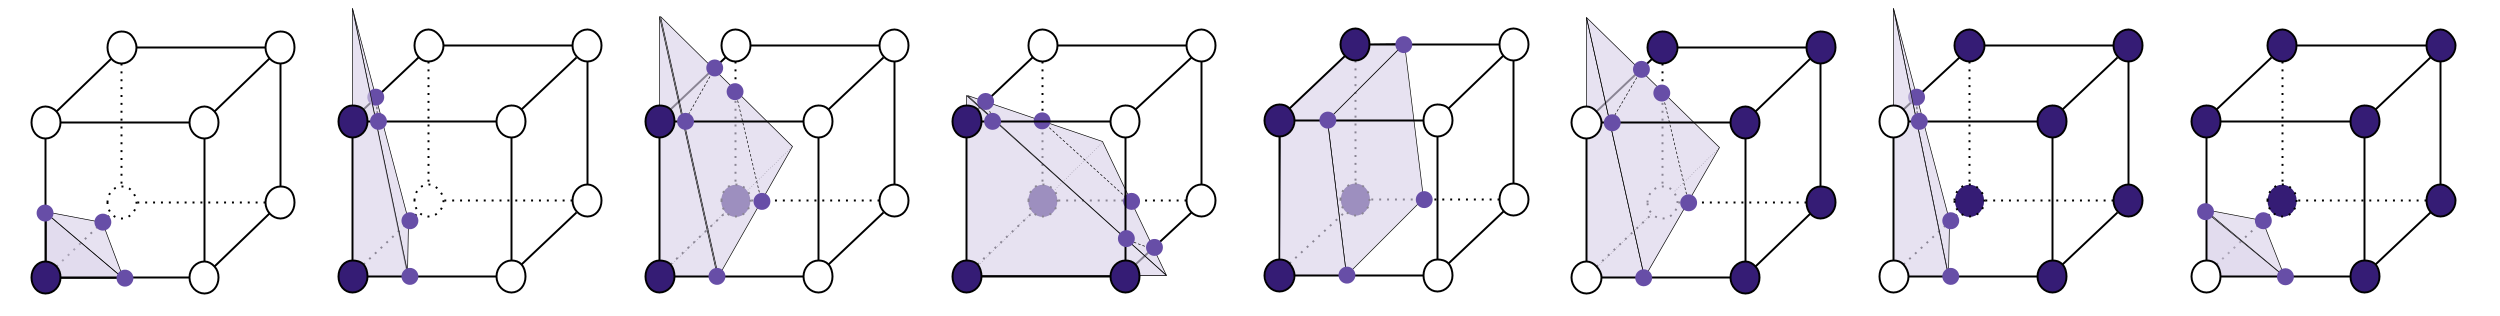

In [1]:
import numpy as np
import sphereint as sphint
import matplotlib.pyplot as plt

In [2]:
N = 64  # Number of data points
L = 40  # Data box size
dx = L/N  # Grid spacing
centre = [int(N/4), int(2*N/4), int(3*N/4)]  # Index of sphere center
SINT = sphint.SphereIntegrate(N, L, centre)  # Define class

In [3]:
radius = 15  # Radius of sphere, periodic boundary conditions are used
weights = SINT.get_box_weights(radius)  # Compute weights for given radius

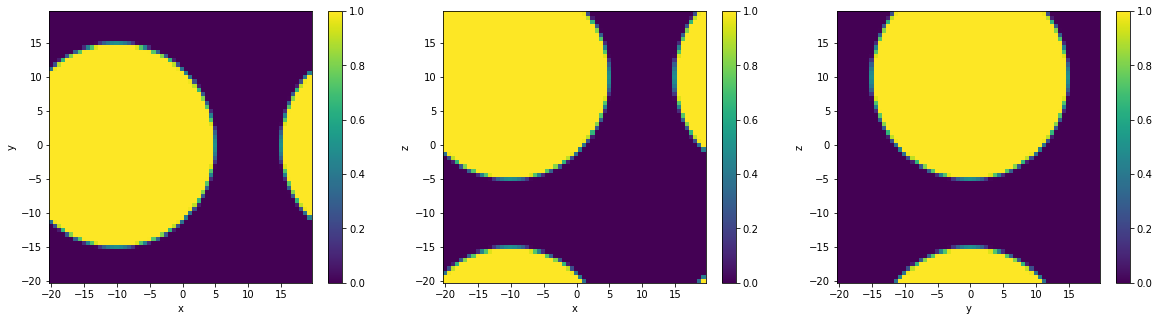

In [4]:
# What the weights look like

coord = np.arange(-L/2, L/2, L/N)
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.pcolor(coord, coord, weights[:, :, centre[2]].T, shading='auto')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.subplot(132)
plt.pcolor(coord, coord, weights[:, centre[1], :].T, shading='auto')
plt.xlabel('x')
plt.ylabel('z')
plt.colorbar()

plt.subplot(133)
plt.pcolor(coord, coord, weights[centre[0], :, :].T, shading='auto')
plt.xlabel('y')
plt.ylabel('z')
plt.colorbar()

In [5]:
# Use the weights to compute the volume

volume_th = (4 * np.pi * radius**3) / 3
print('Theoretical volume:  ', volume_th)

cell_volume = dx**3
volume_num = np.sum(weights * cell_volume)
print('Numerical volume:    ', volume_num)

print('Relative difference: ', abs(volume_num / volume_th - 1))

Theoretical volume:   14137.16694115407
Numerical volume:     14125.011177285984
Relative difference:  0.000859844402961718
